In [12]:
%matplotlib inline
! pip install pymorphy2

  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13705 sha256=47954e6c05ea549f994a6d3887bde8ee3702e5c8e202cfcf279b11457c742c5a
  Stored in directory: c:\users\spostroumov\appdata\local\pip\cache\wheels\56\ea\58\ead137b087d9e326852a851351d1debf4ada529b6ac0ec4e8c
Successfully built docopt


In [2]:
import requests
from bs4 import BeautifulSoup
import json
import csv
import time 
import numpy as np   
import pandas as pd  
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import *
import warnings
warnings.filterwarnings("ignore")

## 1. Парсинг данных

## Соберем данные с сайта по оценке компьютерных игр. В датасете будет ссылка на страницу с игрой, описание и рейтинг

In [2]:
url = "https://metarankings.ru/best-pc-games/page/2/"

headers = {
        "Accept":"*/*",
        "User-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.51 Safari/537.36"
    }

In [3]:
req = requests.get(url, headers = headers)
src = req.text
print (src)

<!DOCTYPE html>
<html lang="ru-RU">
<head>    
<meta http-equiv="Content-Type" content="text/html; charset=UTF-8">
<link rel="manifest" href="/manifest.json">
<meta http-equiv="X-UA-Compatible" content="IE=edge">
<meta name="viewport" content="width=device-width, initial-scale=1">
<title>Лучшие игры на PC — Самые интересные и популярные игры на ПК — рейтинг и оценки - страница 2</title>
<link rel="icon" href="/favicon.png" type="image/png" />
<link rel='stylesheet' id='metarankings-style-css'  href='https://metarankings.ru/wp-content/themes/metarankings/style.css?ver=1.1' type='text/css' media='all' />
<script type='text/javascript' src='https://metarankings.ru/wp-includes/js/jquery/jquery.js?ver=1.11.0'></script>
<script type='text/javascript' src='https://metarankings.ru/wp-includes/js/jquery/jquery-migrate.min.js?ver=1.2.1'></script>
<meta name="description" content="В данном разделе собраны лучшие игры для ПК — Самые интересные и популярные игры для PC в виде списка с подробным опи

## Сохраним страницу, для дальнейшей работы

In [4]:
with open("index.html" , "w",encoding="utf-8") as file:
    file.write(src)

In [5]:
with open("index.html",encoding="utf-8") as file:
    src = file.read()

In [6]:
src

'<!DOCTYPE html>\n<html lang="ru-RU">\n<head>    \n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8">\n<link rel="manifest" href="/manifest.json">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1">\n<title>Лучшие игры на PC — Самые интересные и популярные игры на ПК — рейтинг и оценки - страница 2</title>\n<link rel="icon" href="/favicon.png" type="image/png" />\n<link rel=\'stylesheet\' id=\'metarankings-style-css\'  href=\'https://metarankings.ru/wp-content/themes/metarankings/style.css?ver=1.1\' type=\'text/css\' media=\'all\' />\n<script type=\'text/javascript\' src=\'https://metarankings.ru/wp-includes/js/jquery/jquery.js?ver=1.11.0\'></script>\n<script type=\'text/javascript\' src=\'https://metarankings.ru/wp-includes/js/jquery/jquery-migrate.min.js?ver=1.2.1\'></script>\n<meta name="description" content="В данном разделе собраны лучшие игры для ПК — Самые интересные и популярные игры для P

In [8]:
soup = BeautifulSoup(src,"lxml")

In [17]:
all_products_href = soup.find_all(class_= "post clear") ##.find_all(class_ = 'post clear')
all_products_href

[<div class="post clear">
 <a class="thumb" href="https://metarankings.ru/prey/" title="Игра «Prey»"><img alt="Prey" class="post-image" src="https://metarankings.ru/images/uploads/Prey-boxart-cover-100x140.jpg"/></a>
 <div class="best-prod">
 <div class="counter">31</div>
 <span class="star">★</span>
 </div>
 <a class="name" href="https://metarankings.ru/prey/">Prey</a>
 <div class="post-meta"><p>PC, PS4, Xbox One</p></div>
 <div class="post-meta">
  
 Входит в лучшие в 2017 году по мнению 83% пользователей</div>
 <div class="post-content">Игра Prey для PC и консолей — это перезапуск одноименной серии от разработчиков из Arkane Studios (авторы Dishonored 2). Сюжет Prey развивается в недалеком будущем, в 2032 на космической станции...</div>
 <div class="ratings-graph">
 <div class="graph-critic">
 <div class="graph">
 <div class="small-score mark-9">8.7</div>
 Рейтинг критиков
 <div class="graph-body"><div class="rating-graph mark-9" style="width:87%"></div></div>
 </div>
 </div>
 <div 

In [18]:
all_products_href[0].text

'\n\n\n31\n★\n\nPrey\nPC, PS4, Xbox One\n\n \nВходит в лучшие в 2017 году по мнению 83% пользователей\nИгра Prey для PC и консолей — это перезапуск одноименной серии от разработчиков из Arkane Studios (авторы Dishonored 2). Сюжет Prey развивается в недалеком будущем, в 2032 на космической станции...\n\n\n\n8.7\nРейтинг критиков\n\n\n\n\n\n7.9\nИгроки\n\n\n\n'

In [36]:
ref_list = []
for item in all_products_href:
    ref = item.find('a').get('href')
    ref_list.append(ref)

ref_list

['https://metarankings.ru/prey/',
 'https://metarankings.ru/inside/',
 'https://metarankings.ru/rayman-legends/',
 'https://metarankings.ru/sekiro-shadows-die-twice/',
 'https://metarankings.ru/resident-evil-7-biohazard/',
 'https://metarankings.ru/starcraft-2-legacy-of-the-void/',
 'https://metarankings.ru/dark-souls-ii/',
 'https://metarankings.ru/mortal-kombat-x/',
 'https://metarankings.ru/battlefield-1/',
 'https://metarankings.ru/dead-space-remake/',
 'https://metarankings.ru/dishonored-2/',
 'https://metarankings.ru/metro-redux/',
 'https://metarankings.ru/deus-ex-human-revolution-directors-cut/',
 'https://metarankings.ru/wolfenstein-ii-the-new-colossus/',
 'https://metarankings.ru/hades/',
 'https://metarankings.ru/borderlands-2/',
 'https://metarankings.ru/stray/',
 'https://metarankings.ru/a-plague-tale-requiem/',
 'https://metarankings.ru/overwatch/',
 'https://metarankings.ru/world-of-warcraft-legion/',
 'https://metarankings.ru/the-binding-of-isaac-rebirth/',
 'https://me

## Сохраним ссылки на все оценки

In [43]:
i = 0
url_main = "https://metarankings.ru/best-pc-games/page/2/"
ref_list = []
while i < 29:
    num = i+1
    url = "https://metarankings.ru/best-pc-games/page/" + str(num) + "/"
    req = requests.get(url, headers = headers)
    src = req.text
    soup = BeautifulSoup(src,"lxml")
    all_products_href = soup.find_all(class_= "post clear")
    for item in all_products_href:
        ref = item.find('a').get('href')
        ref_list.append(ref)
    time.sleep(0.5)
    print(f"#  Страница {num} записана")
    i+= 1
print ("Готово!")




#  Страница 1 записана
#  Страница 2 записана
#  Страница 3 записана
#  Страница 4 записана
#  Страница 5 записана
#  Страница 6 записана
#  Страница 7 записана
#  Страница 8 записана
#  Страница 9 записана
#  Страница 10 записана
#  Страница 11 записана
#  Страница 12 записана
#  Страница 13 записана
#  Страница 14 записана
#  Страница 15 записана
#  Страница 16 записана
#  Страница 17 записана
#  Страница 18 записана
#  Страница 19 записана
#  Страница 20 записана
#  Страница 21 записана
#  Страница 22 записана
#  Страница 23 записана
#  Страница 24 записана
#  Страница 25 записана
#  Страница 26 записана
#  Страница 27 записана
#  Страница 28 записана
#  Страница 29 записана
Готово!


In [44]:
ref_list

['https://metarankings.ru/grand-theft-auto-v-obnovlennaya-versiya/',
 'https://metarankings.ru/the-witcher-3-wild-hunt/',
 'https://metarankings.ru/red-dead-redemption-2/',
 'https://metarankings.ru/vedmak-3-dikaya-oxota-krov-i-vino/',
 'https://metarankings.ru/resident-evil-2/',
 'https://metarankings.ru/horizon-zero-dawn/',
 'https://metarankings.ru/baldurs-gate-3/',
 'https://metarankings.ru/divinity-original-sin-2/',
 'https://metarankings.ru/half-life-alyx/',
 'https://metarankings.ru/ori-and-the-will-of-the-wisps/',
 'https://metarankings.ru/dark-souls-iii/',
 'https://metarankings.ru/god-of-war-dlya-pc/',
 'https://metarankings.ru/the-witcher-3-wild-hunt-hearts-of-stone/',
 'https://metarankings.ru/elden-ring/',
 'https://metarankings.ru/metro-exodus/',
 'https://metarankings.ru/disco-elysium/',
 'https://metarankings.ru/forza-horizon-3/',
 'https://metarankings.ru/forza-horizon-4/',
 'https://metarankings.ru/detroit-become-human/',
 'https://metarankings.ru/ori-and-the-blind-fo

In [86]:
game_info = []

for url_game in ref_list:
    req = requests.get(url_game, headers = headers)
    src = req.text
    descr = ""
    soup = BeautifulSoup(src,"lxml")
    description = soup.find(class_= "description").find_all('p')
    for item in description:
        descr += item.text
    rating = soup.find_all(class_ = "score-graph")[-1].text
    game_info.append(
        {
            "Url" : url_game,
            "Description" : descr,
            "Rating" : rating
            }
        )
    time.sleep(1)
    print(f"#  Страница {url_game} записана")
    
print ('Ready')

#  Страница https://metarankings.ru/grand-theft-auto-v-obnovlennaya-versiya/ записана
#  Страница https://metarankings.ru/the-witcher-3-wild-hunt/ записана
#  Страница https://metarankings.ru/red-dead-redemption-2/ записана
#  Страница https://metarankings.ru/vedmak-3-dikaya-oxota-krov-i-vino/ записана
#  Страница https://metarankings.ru/resident-evil-2/ записана
#  Страница https://metarankings.ru/horizon-zero-dawn/ записана
#  Страница https://metarankings.ru/baldurs-gate-3/ записана
#  Страница https://metarankings.ru/divinity-original-sin-2/ записана
#  Страница https://metarankings.ru/half-life-alyx/ записана
#  Страница https://metarankings.ru/ori-and-the-will-of-the-wisps/ записана
#  Страница https://metarankings.ru/dark-souls-iii/ записана
#  Страница https://metarankings.ru/god-of-war-dlya-pc/ записана
#  Страница https://metarankings.ru/the-witcher-3-wild-hunt-hearts-of-stone/ записана
#  Страница https://metarankings.ru/elden-ring/ записана
#  Страница https://metarankings.

#  Страница https://metarankings.ru/total-war-warhammer/ записана
#  Страница https://metarankings.ru/child-of-light/ записана
#  Страница https://metarankings.ru/sid-meiers-civilization-beyond-earth/ записана
#  Страница https://metarankings.ru/life-is-strange-episode-3-chaos-theory/ записана
#  Страница https://metarankings.ru/crusader-kings-3/ записана
#  Страница https://metarankings.ru/world-of-warcraft-warlords-of-draenor/ записана
#  Страница https://metarankings.ru/ni-no-kuni-ii-revenant-kingdom/ записана
#  Страница https://metarankings.ru/marvels-midnight-suns/ записана
#  Страница https://metarankings.ru/street-fighter-v-arcade-edition/ записана
#  Страница https://metarankings.ru/psychonauts-2/ записана
#  Страница https://metarankings.ru/pillars-of-eternity/ записана
#  Страница https://metarankings.ru/star-wars-jedi-fallen-order/ записана
#  Страница https://metarankings.ru/doom-eternal/ записана
#  Страница https://metarankings.ru/xcom-2/ записана
#  Страница https://met

#  Страница https://metarankings.ru/borderlands-the-pre-sequel/ записана
#  Страница https://metarankings.ru/hotline-miami-2-wrong-number/ записана
#  Страница https://metarankings.ru/this-war-of-mine/ записана
#  Страница https://metarankings.ru/steep/ записана
#  Страница https://metarankings.ru/wasteland-3/ записана
#  Страница https://metarankings.ru/deaths-door/ записана
#  Страница https://metarankings.ru/dragon-ball-xenoverse/ записана
#  Страница https://metarankings.ru/age-of-wonders-planetfall/ записана
#  Страница https://metarankings.ru/metro-exodus-istoriya-sema/ записана
#  Страница https://metarankings.ru/the-quarry/ записана
#  Страница https://metarankings.ru/the-entropy-centre/ записана
#  Страница https://metarankings.ru/abzu/ записана
#  Страница https://metarankings.ru/anno-1800/ записана
#  Страница https://metarankings.ru/the-medium/ записана
#  Страница https://metarankings.ru/serious-sam-4/ записана
#  Страница https://metarankings.ru/ace-combat-7-skies-unknown

#  Страница https://metarankings.ru/age-of-empires-iii-definitive-edition/ записана
#  Страница https://metarankings.ru/sniper-ghost-warrior-contracts-2/ записана
#  Страница https://metarankings.ru/metal-hellsinger/ записана
#  Страница https://metarankings.ru/the-texas-chain-saw-massacre/ записана
#  Страница https://metarankings.ru/teslagrad/ записана
#  Страница https://metarankings.ru/furi/ записана
#  Страница https://metarankings.ru/loadout/ записана
#  Страница https://metarankings.ru/shadow-warrior-3/ записана
#  Страница https://metarankings.ru/the-surge-2/ записана
#  Страница https://metarankings.ru/dead-rising-3/ записана
#  Страница https://metarankings.ru/strange-brigade/ записана
#  Страница https://metarankings.ru/vampire-the-masquerade-bloodhunt/ записана
#  Страница https://metarankings.ru/insurgency-sandstorm/ записана
#  Страница https://metarankings.ru/lego-marvel-super-heroes-2/ записана
#  Страница https://metarankings.ru/resident-evil-7-end-of-zoe/ записана
#  

#  Страница https://metarankings.ru/xcom-chimera-squad/ записана
#  Страница https://metarankings.ru/five-nights-at-freddys-security-breach/ записана
#  Страница https://metarankings.ru/assassins-creed-liberation-hd/ записана
#  Страница https://metarankings.ru/f1-2015/ записана
#  Страница https://metarankings.ru/life-is-strange-before-the-storm-episode-1-awake/ записана
#  Страница https://metarankings.ru/zombie-army-4-dead-war/ записана
#  Страница https://metarankings.ru/blair-witch/ записана
#  Страница https://metarankings.ru/trine-5-a-clockwork-conspiracy/ записана
#  Страница https://metarankings.ru/sword-art-online-fatal-bullet/ записана
#  Страница https://metarankings.ru/the-dark-pictures-anthology-house-of-ashes/ записана
#  Страница https://metarankings.ru/state-of-decay-2/ записана
#  Страница https://metarankings.ru/gauntlet/ записана
#  Страница https://metarankings.ru/vampyr/ записана
#  Страница https://metarankings.ru/the-crew-2/ записана
#  Страница https://metarank

#  Страница https://metarankings.ru/fifa-23/ записана
#  Страница https://metarankings.ru/far-cry-5-lost-on-mars/ записана
#  Страница https://metarankings.ru/mount-blade-2-bannerlord/ записана
#  Страница https://metarankings.ru/submerged/ записана
#  Страница https://metarankings.ru/solar-ash/ записана
#  Страница https://metarankings.ru/dolmen/ записана
#  Страница https://metarankings.ru/black-mirror/ записана
#  Страница https://metarankings.ru/mass-effect-andromeda/ записана
#  Страница https://metarankings.ru/eve-valkyrie/ записана
#  Страница https://metarankings.ru/biomutant/ записана
#  Страница https://metarankings.ru/game-amnesia-the-bunker-2023/ записана
#  Страница https://metarankings.ru/immortality/ записана
#  Страница https://metarankings.ru/no-mans-sky/ записана
#  Страница https://metarankings.ru/syberia-3/ записана
#  Страница https://metarankings.ru/call-of-duty-black-ops-cold-war/ записана
#  Страница https://metarankings.ru/sonic-colors-ultimate/ записана
#  Стр

#  Страница https://metarankings.ru/the-guild-3/ записана
#  Страница https://metarankings.ru/black-legend/ записана
#  Страница https://metarankings.ru/diablo-immortal/ записана
#  Страница https://metarankings.ru/saints-row-2022/ записана
#  Страница https://metarankings.ru/project-resistance/ записана
#  Страница https://metarankings.ru/battlefield-2042/ записана
#  Страница https://metarankings.ru/armikrog/ записана
#  Страница https://metarankings.ru/overwatch-2/ записана
#  Страница https://metarankings.ru/godfall/ записана
#  Страница https://metarankings.ru/warhammer-age-of-sigmar-realms-of-ruin/ записана
#  Страница https://metarankings.ru/dungeons-dragons-dark-alliance/ записана
#  Страница https://metarankings.ru/ride/ записана
#  Страница https://metarankings.ru/escape-dead-island/ записана
#  Страница https://metarankings.ru/fifa-21/ записана
#  Страница https://metarankings.ru/predator-hunting-grounds/ записана
#  Страница https://metarankings.ru/twin-souls-the-path-of-sh

## Сохраним итоговый датасет в Json файл для дальнейшего использования

In [3]:
with open("data.json", "a",encoding = "utf-8") as file:
    json.dump(game_info,file,indent = 4, ensure_ascii= False)

NameError: name 'game_info' is not defined

## 2. NLP.

In [3]:
with open('data.json', "r",encoding = "utf-8") as f:
    data = json.load(f)

In [4]:
import nltk   # Natural Language Toolkit

In [5]:
# загружаем список стоп-слов для русского
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('russian')

# примеры стоп-слов
print(len(stop_words))
print(stop_words[:10])

151
['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\spostroumov\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
word_tokenizer = nltk.WordPunctTokenizer()


In [7]:
import re
regex = re.compile(r'[А-Яа-яA-zёЁ-]+')

def words_only(text, regex=regex):
    try:
        return " ".join(regex.findall(text)).lower()
    except:
        return ""



In [8]:
add_stop_words = ['игра','пк','геймер','консоль']

all_stop_words = stop_words + add_stop_words 


In [9]:
for item in tqdm(data):
    print(item)

100%|██████████| 857/857 [00:00<00:00, 51303.36it/s]

{'Url': 'https://metarankings.ru/grand-theft-auto-v-obnovlennaya-versiya/', 'Description': 'Grand Theft Auto V — это обновленная версия для консолей нового поколения и ПК вышедшей в прошлом году\xa0 пятой части легендарной серии.Игра обзавелась похорошевшей графикой, увеличенным разрешением, новыми деталями, большей дальностью прорисовки, всеми дополнениями и видом от первого лица. Теперь игроки могут исследовать мир Лос-Сантоса глазами своего персонажа от первого лица, открывая детали мира Grand Theft Auto V совершенно по новому.Rockstar Games внесли массу всевозможных изменений, чтобы это стало возможным, добавив новую систему таргетинга, более традиционную схему управления для шутеров, а также тысячи новых анимаций в существующий игровой мир. Переключаться в вид от первого лица можно\xa0 по нажатию кнопки, так что вы можете легко переключаться между перспективами в реальном времени.', 'Rating': '9.2'}
{'Url': 'https://metarankings.ru/the-witcher-3-wild-hunt/', 'Description': 'Игра T

In [10]:
def process_data(data):
    texts = []
    targets = []

    # поочередно проходим по всем новостям в списке
    for item in tqdm(data):

        text_lower = words_only(item['Description']) # оставим только слова
        tokens     = word_tokenizer.tokenize(text_lower) #разбиваем текст на слова

        # удаляем пунктуацию и стоп-слова
        tokens = [word for word in tokens if (word not in all_stop_words and not word.isnumeric())]

        texts.append(tokens) # добавляем в предобработанный список

    return texts

In [11]:
y = [item['Rating'] for item in data]
texts = process_data(data)

100%|██████████| 857/857 [00:00<00:00, 6969.24it/s]


In [12]:
# example
i = 1
print("Label: ", y[i])
print("Tokens: ", texts[i][:5])

Label:  9.2
Tokens:  ['the', 'witcher', 'wild', 'hunt', 'ведьмак']


In [13]:
# загружаем библиотеку для лемматизации
import pymorphy2 # Морфологический анализатор

# инициализируем лемматизатор
morph = pymorphy2.MorphAnalyzer()

In [14]:
i = 1
for aword in texts[0][:10]:
    aword_norm = morph.parse(aword)[0].normal_form
    print("Исходное слово: %s\tЛемматизированное: %s" % (aword, aword_norm))

Исходное слово: grand	Лемматизированное: grand
Исходное слово: theft	Лемматизированное: theft
Исходное слово: auto	Лемматизированное: auto
Исходное слово: v	Лемматизированное: v
Исходное слово: это	Лемматизированное: это
Исходное слово: обновленная	Лемматизированное: обновить
Исходное слово: версия	Лемматизированное: версия
Исходное слово: консолей	Лемматизированное: консоль
Исходное слово: нового	Лемматизированное: новый
Исходное слово: поколения	Лемматизированное: поколение


In [15]:
# применяем лемматизацию ко всем текстам
for i in range(len(texts)):           # tqdm_notebook создает шкалу прогресса :)
    text_lemmatized = [morph.parse(x)[0].normal_form for x in texts[i]] # применяем лемматизацию для каждого слова в тексте
    texts[i] = ' '.join(text_lemmatized)                # объединяем все слова в одну строку через пробел

In [16]:
texts

['grand theft auto v это обновить версия консоль новый поколение выйти прошлый год пятый часть легендарный серия обзавестись похорошеть графика увеличить разрешение новый деталь больший дальность прорисовка весь дополнение вид первый лицо игрок мочь исследовать мир лос - сантос глаз свой персонаж первый лицо открывать деталь мир grand theft auto v совершенно новый rockstar games внести масса всевозможный изменение это стать возможный добавить новый система таргетинг традиционный схема управление шутер также тысяча новый анимация существующий игровой мир переключаться вид первый лицо нажатие кнопка мочь легко переключаться перспектива реальный время',
 'the witcher wild hunt ведьмак дикий охота новый часть знаменитый серия польский студия cd projekt red который сочетать фирменный нелинейный сюжет открытый разнообразный мир который любой современный рпг купе современный графика общий площадь мир тридцать мир предыдущий часть серия ведьмак ждать полностью открытый мир исследование какой -

In [17]:
i = 1
print("Label: ",   y[i])
print("Text: \n",  texts[i])

Label:  9.2
Text: 
 the witcher wild hunt ведьмак дикий охота новый часть знаменитый серия польский студия cd projekt red который сочетать фирменный нелинейный сюжет открытый разнообразный мир который любой современный рпг купе современный графика общий площадь мир тридцать мир предыдущий часть серия ведьмак ждать полностью открытый мир исследование какой - либо искусственный граница ограничение покорение передвижение этот многогранный разнообразный мир использовать различный транспорт например лошадь корабль сюжетный линия wild hunt продолжать история геральт ривия ведьмак охотник монстр центр сюжет новый вторжение нильфгаард также поиск потерянный возлюбить конфликт дикий охота сюжет делиться разнообразный глава стать осуществимый благодаря движок новый поколение redengine решение принять мера прохождение сюжетный компания быть влечь себя внушительный последствие предыдущий часть


In [27]:
data

[{'Url': 'https://metarankings.ru/grand-theft-auto-v-obnovlennaya-versiya/',
  'Description': 'Grand Theft Auto V — это обновленная версия для консолей нового поколения и ПК вышедшей в прошлом году\xa0 пятой части легендарной серии.Игра обзавелась похорошевшей графикой, увеличенным разрешением, новыми деталями, большей дальностью прорисовки, всеми дополнениями и видом от первого лица. Теперь игроки могут исследовать мир Лос-Сантоса глазами своего персонажа от первого лица, открывая детали мира Grand Theft Auto V совершенно по новому.Rockstar Games внесли массу всевозможных изменений, чтобы это стало возможным, добавив новую систему таргетинга, более традиционную схему управления для шутеров, а также тысячи новых анимаций в существующий игровой мир. Переключаться в вид от первого лица можно\xa0 по нажатию кнопки, так что вы можете легко переключаться между перспективами в реальном времени.',
  'Rating': '9.2'},
 {'Url': 'https://metarankings.ru/the-witcher-3-wild-hunt/',
  'Description'

## tf-idf преобразование для текстового описания

In [18]:
#train test_split
from sklearn.model_selection import train_test_split
train_texts, test_texts, train_y, test_y = train_test_split(texts, y, test_size=0.2, random_state=42)

In [19]:
#вычисляем tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
# Fit TF-IDF on train texts
vectorizer = TfidfVectorizer( norm = None,min_df=5, max_df=0.7,) # возмем топ 200 слов
vectorizer.fit(train_texts)



TfidfVectorizer(max_df=0.7, min_df=5, norm=None)

## Линейная регрессия

In [20]:
# Обучаем TF-IDF на train, а затем применяем к train и test
train_X = vectorizer.fit_transform(train_texts)
test_X  = vectorizer.transform(test_texts)

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lr =  LinearRegression().fit(train_X, train_y)

In [23]:
print(lr.score(test_X, test_y))

-0.7117497748034409


In [24]:
y_pred = lr.predict(test_X)
y_pred


array([3.72637930e+00, 6.02949851e+00, 7.56777239e+00, 6.92464164e+00,
       7.85233341e+00, 2.36760878e+00, 4.00528282e+00, 8.00192138e+00,
       5.67268405e+00, 8.93758322e+00, 5.19586556e+00, 6.37257109e+00,
       5.75873782e+00, 7.99540277e+00, 7.77756161e+00, 5.72249513e+00,
       7.61078043e+00, 1.07758817e+01, 5.80581617e+00, 6.37257109e+00,
       6.54041599e+00, 3.68696611e+00, 6.50365893e-01, 2.75058419e+00,
       6.20806982e+00, 6.15820710e+00, 6.59927636e+00, 2.81969744e+00,
       2.12916426e-07, 5.99976023e+00, 6.80130739e+00, 4.49646636e+00,
       9.85581026e+00, 7.59244997e-01, 3.67708931e+00, 8.00436918e+00,
       6.38771466e+00, 6.64188613e+00, 1.00337927e+01, 7.53515037e+00,
       1.00772746e+01, 3.82919813e+00, 6.35594830e+00, 6.29275313e+00,
       6.60903849e+00, 8.52501013e+00, 5.92313557e+00, 9.12254107e+00,
       6.23415035e+00, 6.21109112e+00, 7.01255625e+00, 8.62591415e+00,
       7.28001167e+00, 6.43269376e+00, 6.29999997e+00, 6.16582153e+00,
      

In [27]:
df = pd.DataFrame({'Actual': test_y, 'Predicted': y_pred})
df

,Actual,Predicted
0,5.6,3.726379
1,6.3,6.029499
2,7.9,7.567772
3,7.6,6.924642
4,7.1,7.852333
...,...,...
167,6.6,6.317713
168,7.6,5.924525
169,7.3,7.300000
170,7.6,4.654017


In [28]:
lr.intercept_

6.064042912800896

In [29]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(test_y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))


Mean Absolute Error: 1.9722594398325406
Mean Squared Error: 7.641659722427036
Root Mean Squared Error: 2.7643552091630763


## Визуализация

In [33]:
lr.coef_

array([ 0.070548  , -0.00090429,  0.03917408, ..., -0.07368228,
        0.03015996,  0.02719917])

In [39]:
dir(vectorizer)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_char_ngrams',
 '_char_wb_ngrams',
 '_check_n_features',
 '_check_params',
 '_check_stop_words_consistency',
 '_check_vocabulary',
 '_count_vocab',
 '_get_param_names',
 '_get_tags',
 '_limit_features',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sort_features',
 '_stop_words_id',
 '_tfidf',
 '_validate_data',
 '_validate_params',
 '_validate_vocabulary',
 '_warn_for_unused_params',
 '_white_spaces',
 '_word_ngrams',
 'analyzer',
 'binary',
 'build_analyzer',
 'build_preprocessor',
 'build_tokenizer',
 'decode',
 'decode_error',
 'dtype',
 'encoding',
 'f

In [41]:
words = vectorizer.get_feature_names()
words

['age',
 'and',
 'assassin',
 'black',
 'borderlands',
 'bros',
 'call',
 'capcom',
 'chronicles',
 'city',
 'clancy',
 'collection',
 'creed',
 'cry',
 'crystal',
 'dark',
 'dawn',
 'dead',
 'devil',
 'dishonored',
 'dontnod',
 'dragon',
 'duty',
 'ea',
 'edition',
 'elite',
 'engine',
 'entertainment',
 'episode',
 'evil',
 'evolution',
 'far',
 'fifa',
 'for',
 'forza',
 'from',
 'frostbite',
 'game',
 'games',
 'gears',
 'ghost',
 'hd',
 'human',
 'hunter',
 'ii',
 'iii',
 'in',
 'interactive',
 'is',
 'konami',
 'last',
 'legacy',
 'legend',
 'legends',
 'lego',
 'life',
 'light',
 'lost',
 'mad',
 'man',
 'marvel',
 'me',
 'modern',
 'monster',
 'mortal',
 'nba',
 'need',
 'new',
 'ninja',
 'of',
 'one',
 'order',
 'pc',
 'pes',
 'pictures',
 'prey',
 'pro',
 'project',
 'ps',
 'pubg',
 'pvp',
 'red',
 'remastered',
 'resident',
 'resistance',
 'rise',
 'rogue',
 'rpg',
 'sega',
 'shadow',
 'shadows',
 'sniper',
 'soccer',
 'software',
 'souls',
 'speed',
 'strange',
 'studios',


In [44]:
export_df = pd.DataFrame({'words':words,'coef':lr.coef_})

In [47]:
export_df = export_df.sort_values(by=['coef'],ascending=False).head(50)
export_df

,words,coef
688,одноимённый,0.403218
423,знаменитый,0.341562
1211,уничтожать,0.256238
114,warrior,0.217315
492,компьютерный,0.210803
1137,судьба,0.205308
211,внимание,0.193490
1205,улучшение,0.193061
139,атмосферный,0.191464
595,музыка,0.189423


<AxesSubplot:xlabel='words'>

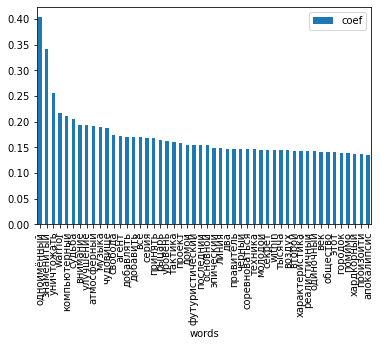

In [57]:
export_df.plot.bar(x='words', y='coef')

In [56]:
help(export_df.plot.bar)

Help on method bar in module pandas.plotting._core:

bar(x=None, y=None, **kwargs) method of pandas.plotting._core.PlotAccessor instance
    Vertical bar plot.
    
    A bar plot is a plot that presents categorical data with
    rectangular bars with lengths proportional to the values that they
    represent. A bar plot shows comparisons among discrete categories. One
    axis of the plot shows the specific categories being compared, and the
    other axis represents a measured value.
    
    Parameters
    ----------
    x : label or position, optional
        Allows plotting of one column versus another. If not specified,
        the index of the DataFrame is used.
    y : label or position, optional
        Allows plotting of one column versus another. If not specified,
        all numerical columns are used.
    color : str, array_like, or dict, optional
        The color for each of the DataFrame's columns. Possible values are:
    
        - A single color string referred to by